In [43]:
 pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opencv-python in c:\users\hp\anaconda3\lib\site-packages (4.4.0.46)



In [36]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import easydict

In [37]:
xmls =  os.listdir(r"E:\Semester 5\Machine Learning\ML project\Datasets\simple_pages_train\xmls")
images = os.listdir(r"E:\Semester 5\Machine Learning\ML project\Datasets\simple_pages_train\images")

In [44]:
print(xmls)

['ONB_aze_18950706_2.xml', 'ONB_aze_18950706_4.xml', 'ONB_aze_19110701_004.xml', 'ONB_aze_19110701_005.xml', 'ONB_aze_19110701_007.xml', 'ONB_aze_19330701_page10_image1.xml', 'ONB_aze_19330701_page10_image2.xml', 'ONB_ibn_18640702_001.xml', 'ONB_ibn_18640702_003.xml', 'ONB_ibn_18640702_004.xml', 'ONB_ibn_18640702_005.xml', 'ONB_ibn_18640702_006.xml', 'ONB_ibn_18640702_007.xml', 'ONB_ibn_19110701_002.xml', 'ONB_ibn_19110701_003.xml', 'ONB_ibn_19110701_005.xml', 'ONB_ibn_19110701_006.xml', 'ONB_ibn_19110701_007.xml', 'ONB_ibn_19110701_009.xml', 'ONB_ibn_19330701_008.xml', 'ONB_ibn_19330701_009.xml', 'ONB_krz_19110701_006.xml', 'ONB_krz_19110701_011.xml', 'ONB_krz_19110701_012.xml', 'ONB_krz_19330701_008.xml', 'ONB_krz_19330701_010.xml', 'ONB_nfp_18730705_001.xml', 'ONB_nfp_18730705_002.xml', 'ONB_nfp_18730705_003.xml', 'ONB_nfp_18730705_007.xml', 'ONB_nfp_19110701_002.xml', 'ONB_nfp_19110701_003.xml', 'ONB_nfp_19110701_005.xml', 'ONB_nfp_19110701_006.xml', 'ONB_nfp_19110701_008.xml', 'ON

In [45]:
print(images)

['ONB_aze_18950706_2.jpg', 'ONB_aze_18950706_4.jpg', 'ONB_aze_19110701_004.jpg', 'ONB_aze_19110701_005.jpg', 'ONB_aze_19110701_007.jpg', 'ONB_aze_19330701_page10_image1.tif', 'ONB_aze_19330701_page10_image2.tif', 'ONB_ibn_18640702_001.tif', 'ONB_ibn_18640702_003.tif', 'ONB_ibn_18640702_004.tif', 'ONB_ibn_18640702_005.tif', 'ONB_ibn_18640702_006.tif', 'ONB_ibn_18640702_007.tif', 'ONB_ibn_19110701_002.tif', 'ONB_ibn_19110701_003.tif', 'ONB_ibn_19110701_005.tif', 'ONB_ibn_19110701_006.tif', 'ONB_ibn_19110701_007.tif', 'ONB_ibn_19110701_009.tif', 'ONB_ibn_19330701_008.jpg', 'ONB_ibn_19330701_009.jpg', 'ONB_krz_19110701_006.jpg', 'ONB_krz_19110701_011.jpg', 'ONB_krz_19110701_012.jpg', 'ONB_krz_19330701_008.jpg', 'ONB_krz_19330701_010.jpg', 'ONB_nfp_18730705_001.tif', 'ONB_nfp_18730705_002.tif', 'ONB_nfp_18730705_003.tif', 'ONB_nfp_18730705_007.tif', 'ONB_nfp_19110701_002.tif', 'ONB_nfp_19110701_003.tif', 'ONB_nfp_19110701_005.tif', 'ONB_nfp_19110701_006.tif', 'ONB_nfp_19110701_008.tif', 'ON

In [40]:
def draw_polygon(img,coordinates):
    vertices = []
    for point in coordinates:
        point = list(point)
        vertices.append(point)
    vertices = np.array(vertices,dtype=np.int32)
    pts = vertices.reshape(-1,1,2)
    cv2.polylines(img,[pts],True,color=(255,0,0),thickness=10)
    return img

In [41]:
def draw_mask(img,coordinates):
    vertices = []
    for point in coordinates:
        point = list(point)
        vertices.append(point)
    vertices = np.array(vertices,dtype=np.int32)
    pts = vertices.reshape(-1,1,2)
    cv2.fillConvexPoly(img,pts,(255,255,255))
    plt.imshow(img)
    return img

In [42]:
import os
from argparse import ArgumentParser
import numpy as np

from citlab_python_util.parser.xml.page.page import Page

if __name__ == "__main__":
    for xml,image in zip(xmls,images):
        parser = ArgumentParser()
        parser.add_argument("--path_to_page", type=str,
                            help="Path to the PAGE XML file")
        parser.add_argument("--save_folder", type=str, default=None,
                            help="Path to the save folder. If None, overwrite the original PAGE file")
        path_xml = r"E:\Semester 5\Machine Learning\ML project\Datasets\simple_pages_train\xmls\{}".format(xml)
        save =  r"E:\Semester 5\Machine Learning\ML project\Datasets\simple_pages_train_mask"
        img_path = r"E:\Semester 5\Machine Learning\ML project\Datasets\simple_pages_train\images\{}".format(image)
        args = easydict.EasyDict({
            'path_to_page': path_xml,
            
            'save_folder': save
        })

        save_path = args.path_to_page

        if args.save_folder is not None:
            page_filename = os.path.basename(args.path_to_page)
            save_path = os.path.join(args.save_folder, page_filename)

        # generate page object
        page_obj = Page(path_to_xml=args.path_to_page)


        # all lines of the image (no further used in this example)
        list_of_image_lines = page_obj.get_textlines()
        #print(list_of_image_lines[0].baseline.points_list)

        # all regions of the image (without image/graphic regions)
        list_of_image_regions = page_obj.get_text_regions()

        region_points = [region.points.points_list for region in list_of_image_regions]
        
        img = cv2.imread(img_path)
            
        for region in region_points:
            img = draw_polygon(img,region)
            

    
        mask = img.copy()
        mask[:,:,:] = 0

        for region in region_points:
            mask = draw_mask(mask,region)
    
        cv2.imwrite(save+f"\Mask_{image}",mask)
        

PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by E:\Semester 5\Machine Learning\ML project\Datasets\simple_pages_train\xmls\ONB_aze_18950706_2.xml is not a valid PageXml file.


MemoryError: Unable to allocate 53.9 MiB for an array with shape (5356, 3518, 3) and data type bool

MemoryError: Unable to allocate 73.6 MiB for an array with shape (5362, 3597, 4) and data type uint8

<Figure size 432x288 with 1 Axes>

In [30]:
#random = cv2.imread(r"C:\Users\Divyansh Joshi\My PC (Divyansh)\Desktop\Text Block Seg\citlab-python-util-master\Result\image_with_borders\Mask_ONB_aze_18950706_2.jpg")

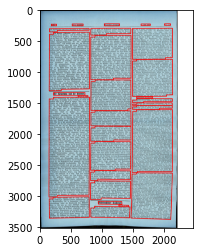

In [31]:
#plt.imshow(random)

In [32]:
#random[:,:,:] = 0